In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daten einlesen
umsatzdaten = pd.read_csv("umsatzdaten_gekuerzt.csv", parse_dates=["Datum"])
kiwo = pd.read_csv("kiwo.csv", parse_dates=["Datum"])
wetter = pd.read_csv("wetter.csv", parse_dates=["Datum"])
# f-String: Ermöglicht, dass Python-Expressions (z. B. umsatzdaten.shape) direkt in einen String eingebettet werden
print(f"Umsatzdaten Zeilen, Spalten:\n{umsatzdaten.shape}")
print(f"\nKiWo Zeilen, Spalten:\n{kiwo.shape}")
print(f"\nWetter Zeilen, Spalten:\n{wetter.shape}")

Umsatzdaten Zeilen, Spalten:
(9334, 3)

KiWo Zeilen, Spalten:
(72, 2)

Wetter Zeilen, Spalten:
(2601, 5)


In [58]:
# Daten zusammenführen
# Merging Umsatzdaten und Kieler Woche
merged_data = pd.merge(umsatzdaten, kiwo, on="Datum", how="left")
# Merging mit Wetterdaten
merged_data = pd.merge(merged_data, wetter, on="Datum", how="left")


In [59]:
# Deskriptive Statistiken
print("Deskriptive Statistiken:")
print(merged_data.describe())
print("\nInfo:")
print(merged_data.info())

Deskriptive Statistiken:
                               Datum  Warengruppe       Umsatz  KielerWoche  \
count                           9334  9334.000000  9334.000000        223.0   
mean   2016-01-13 23:56:27.100921344     3.088172   206.749044          1.0   
min              2013-07-01 00:00:00     1.000000     7.051201          1.0   
25%              2014-10-12 00:00:00     2.000000    96.897441          1.0   
50%              2016-01-10 00:00:00     3.000000   161.900831          1.0   
75%              2017-04-22 00:00:00     4.000000   280.644663          1.0   
max              2018-07-31 00:00:00     6.000000  1879.461831          1.0   
std                              NaN     1.489002   144.545189          0.0   

        Bewoelkung   Temperatur  Windgeschwindigkeit   Wettercode  
count  9264.000000  9318.000000          9318.000000  7009.000000  
mean      4.720747    12.028483            10.974780    36.900128  
min       0.000000    -8.475000             3.000000     0.

In [60]:
# Umsatzdaten umstrukturieren, sodass jedes Datum nur einmal vorkommt

# Dies transformiert die Warengruppe in separate Spalten für jeden Umsatz
umsatz_strukturiert = umsatzdaten.pivot(index='Datum', columns='Warengruppe', values='Umsatz')
print("\nPivotiertes DataFrame:")
print(umsatz_strukturiert.head())
umsatz_strukturiert.to_csv("C:\\Users\\nn\\Downloads\\pivot_df.csv", index=True)

# Warengruppe 6 gibts nur von ca. November bis Dezember!


Pivotiertes DataFrame:
Warengruppe           1           2           3          4           5   6
Datum                                                                     
2013-07-01   148.828353  535.856285  201.198426  65.890169  317.475875 NaN
2013-07-02   159.793757  546.780787  265.261254  74.543917  383.628682 NaN
2013-07-03   111.885594  427.343259  210.260241  69.262728  305.523072 NaN
2013-07-04   168.864941  454.859641  190.686641  61.490175  308.408168 NaN
2013-07-05   171.280754  492.818804  181.644870  86.759861  355.518770 NaN


In [61]:
# Spalten umbenennen (Umsatz1, Umsatz2, ..., Umsatz6)
umsatz_strukturiert = umsatz_strukturiert.rename(columns=lambda x: f'Umsatz{x}')

# Gesamtumsatz berechnen (Summe der Umsätze von Umsatz1 bis Umsatz6)
umsatz_strukturiert['Gesamtumsatz'] = umsatz_strukturiert.sum(axis=1)

# Optional: Fehlende Warengruppen mit 0 auffüllen, falls einige Warengruppen an bestimmten Tagen fehlen
umsatz_strukturiert = umsatz_strukturiert.fillna(0)

# Spalten in der gewünschten Reihenfolge anordnen
umsatz_spalten = [f'Umsatz{x}' for x in range(1, 7)]
umsatz_strukturiert = umsatz_strukturiert[umsatz_spalten + ['Gesamtumsatz']]

print(umsatz_strukturiert.head())

Warengruppe     Umsatz1     Umsatz2     Umsatz3    Umsatz4     Umsatz5  \
Datum                                                                    
2013-07-01   148.828353  535.856285  201.198426  65.890169  317.475875   
2013-07-02   159.793757  546.780787  265.261254  74.543917  383.628682   
2013-07-03   111.885594  427.343259  210.260241  69.262728  305.523072   
2013-07-04   168.864941  454.859641  190.686641  61.490175  308.408168   
2013-07-05   171.280754  492.818804  181.644870  86.759861  355.518770   

Warengruppe  Umsatz6  Gesamtumsatz  
Datum                               
2013-07-01       0.0   1269.249107  
2013-07-02       0.0   1430.008397  
2013-07-03       0.0   1124.274894  
2013-07-04       0.0   1184.309567  
2013-07-05       0.0   1288.023060  


In [62]:
# Datum als Spalte statt Index
umsatz_strukturiert = umsatz_strukturiert.reset_index()
print("Kopf:")
print(umsatz_strukturiert.head())
print("\nunteres Ende:")
print(umsatz_strukturiert.tail())
# einfach die linke "Warengruppe" Spalte ignorieren, die ist nicht wirklich da

Kopf:
Warengruppe      Datum     Umsatz1     Umsatz2     Umsatz3    Umsatz4  \
0           2013-07-01  148.828353  535.856285  201.198426  65.890169   
1           2013-07-02  159.793757  546.780787  265.261254  74.543917   
2           2013-07-03  111.885594  427.343259  210.260241  69.262728   
3           2013-07-04  168.864941  454.859641  190.686641  61.490175   
4           2013-07-05  171.280754  492.818804  181.644870  86.759861   

Warengruppe     Umsatz5  Umsatz6  Gesamtumsatz  
0            317.475875      0.0   1269.249107  
1            383.628682      0.0   1430.008397  
2            305.523072      0.0   1124.274894  
3            308.408168      0.0   1184.309567  
4            355.518770      0.0   1288.023060  

unteres Ende:
Warengruppe      Datum     Umsatz1     Umsatz2     Umsatz3     Umsatz4  \
1814        2018-07-27  198.225523  677.415844  333.774099   65.563734   
1815        2018-07-28  214.470393  716.576825  371.819770   54.047422   
1816        2018-07-29  

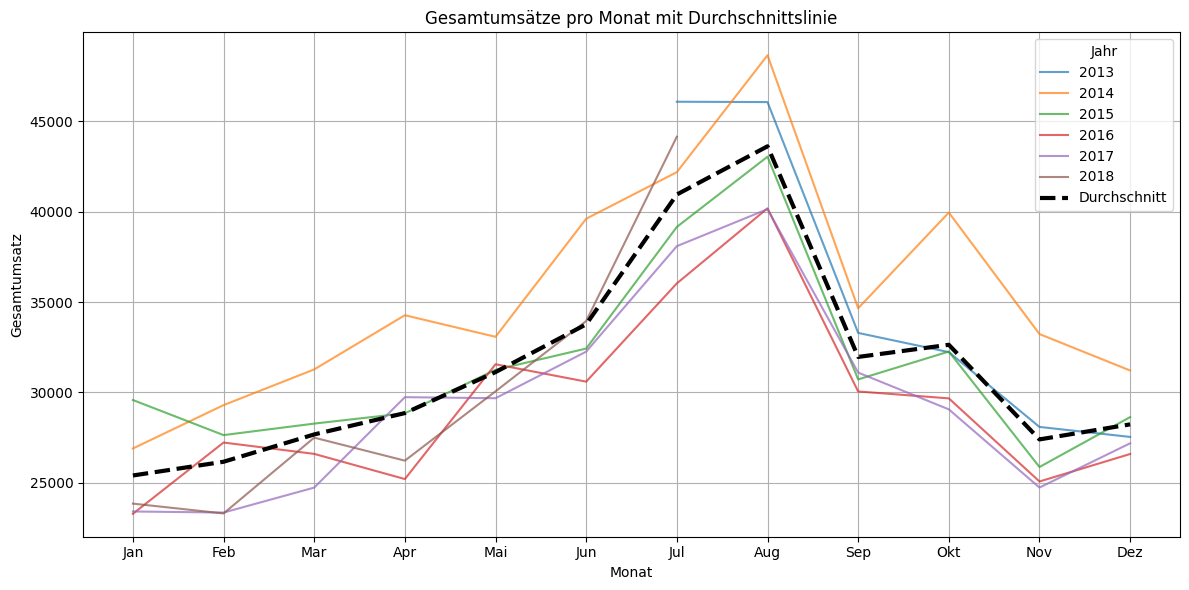

In [63]:
# Umwandlung der 'Datum'-Spalte in Datetime-Format
umsatz_strukturiert['Datum'] = pd.to_datetime(umsatz_strukturiert['Datum'])

# Extrahiere Jahr und Monat aus der 'Datum'-Spalte (neue Spalten werden erstellt)
umsatz_strukturiert['Jahr'] = umsatz_strukturiert['Datum'].dt.year
umsatz_strukturiert['Monat'] = umsatz_strukturiert['Datum'].dt.month

# Aggregiere (aufteilen) den Gesamtumsatz nach Jahr und Monat 
umsatz_pro_monat = umsatz_strukturiert.groupby(['Jahr', 'Monat'])['Gesamtumsatz'].sum().reset_index()

# Berechnung des monatlichen Durchschnitts über alle Jahre
monatlicher_umsatz_durchschnitt = umsatz_pro_monat.groupby('Monat')['Gesamtumsatz'].mean()

plt.figure(figsize=(12, 6))

# Linienplot für jedes Jahr
for year in umsatz_pro_monat['Jahr'].unique():
   year_data = umsatz_pro_monat[umsatz_pro_monat['Jahr'] == year]
   plt.plot(year_data['Monat'], year_data['Gesamtumsatz'], label=str(year), alpha=0.7)

# Durchschnitts-Linie hinzufügen
plt.plot(range(1, 13), monatlicher_umsatz_durchschnitt, color='black', linewidth=3, linestyle='--', label='Durchschnitt')

# Formatierung
plt.title('Gesamtumsätze pro Monat mit Durchschnittslinie')
plt.xlabel('Monat')
plt.ylabel('Gesamtumsatz')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'])
plt.legend(title='Jahr')

plt.grid(True)
plt.tight_layout()
plt.show()


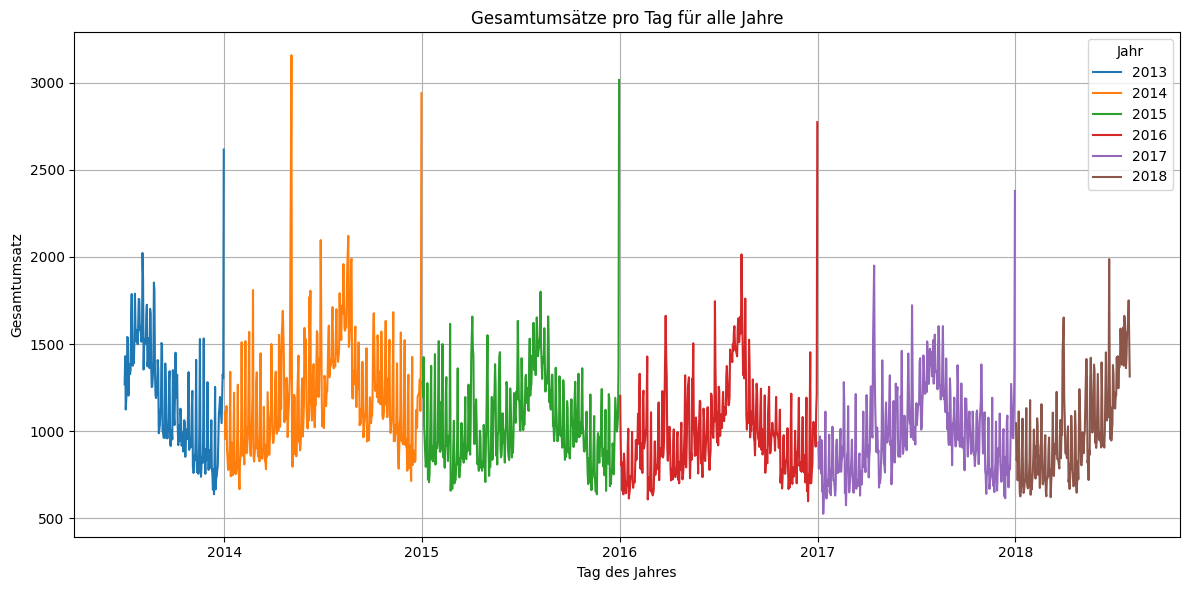

In [64]:
# Aggregiere den Gesamtumsatz nach Jahr und Datum
umsatz_pro_tag = umsatz_strukturiert.groupby(['Jahr', 'Datum'])['Gesamtumsatz'].sum().reset_index()

# Plot erstellen
plt.figure(figsize=(12, 6))

# Linienplot für jedes Jahr
for year in umsatz_pro_tag['Jahr'].unique():
    year_data = umsatz_pro_tag[umsatz_pro_tag['Jahr'] == year]
    plt.plot(year_data['Datum'], year_data['Gesamtumsatz'], label=str(year))

# Formatierung
plt.title('Gesamtumsätze pro Tag für alle Jahre')
plt.xlabel('Tag des Jahres')
plt.ylabel('Gesamtumsatz')
plt.legend(title='Jahr')

# Diagramm anzeigen
plt.grid(True)
plt.tight_layout()
plt.show()

# Peak zur Weihnachtszeit!
# Saisonale Abhängigkeit
# was ist das 2014 für ein Peak im April/Mai?

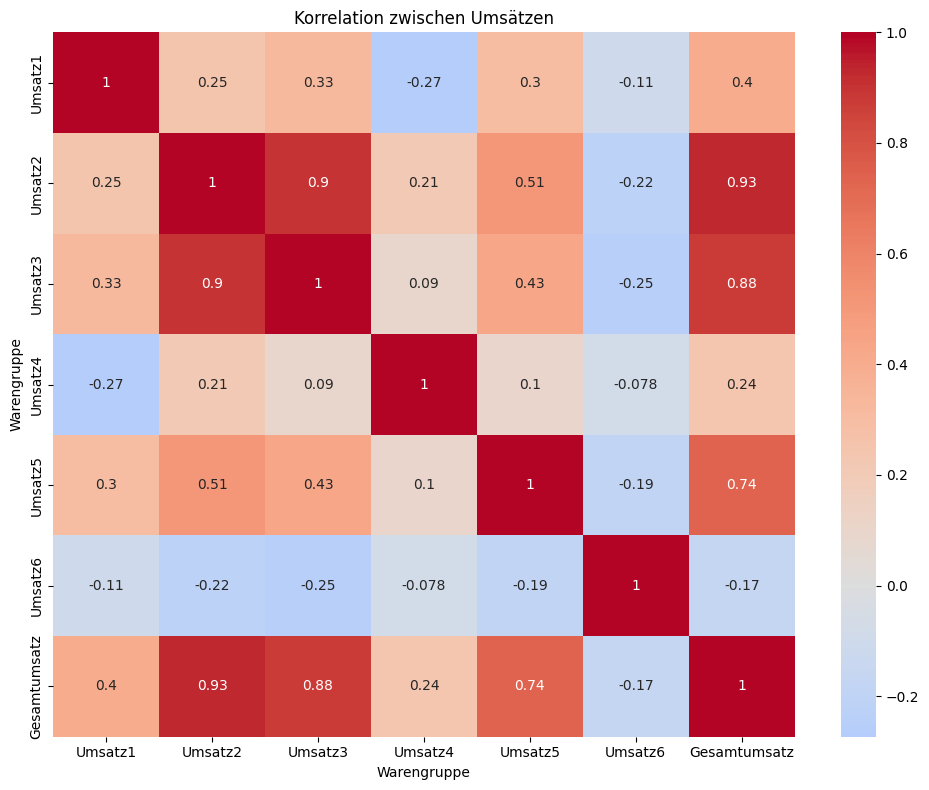

In [65]:
# Korrelationsmatrix der numerischen Spalten
correlation_matrix = umsatz_strukturiert[['Umsatz1', 'Umsatz2', 'Umsatz3', 'Umsatz4', 'Umsatz5', 'Umsatz6', 'Gesamtumsatz']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelation zwischen Umsätzen')
plt.tight_layout()
plt.show()

# --> Hohe Korrelation zwischen Warengruppe 2 und 3
# --> Warengruppe 2 trägt am Meisten zum Gesamtumsat bei
# --> Warengruppe 6 ist anders: wird nur zur Weihnachtszeit angeboten!


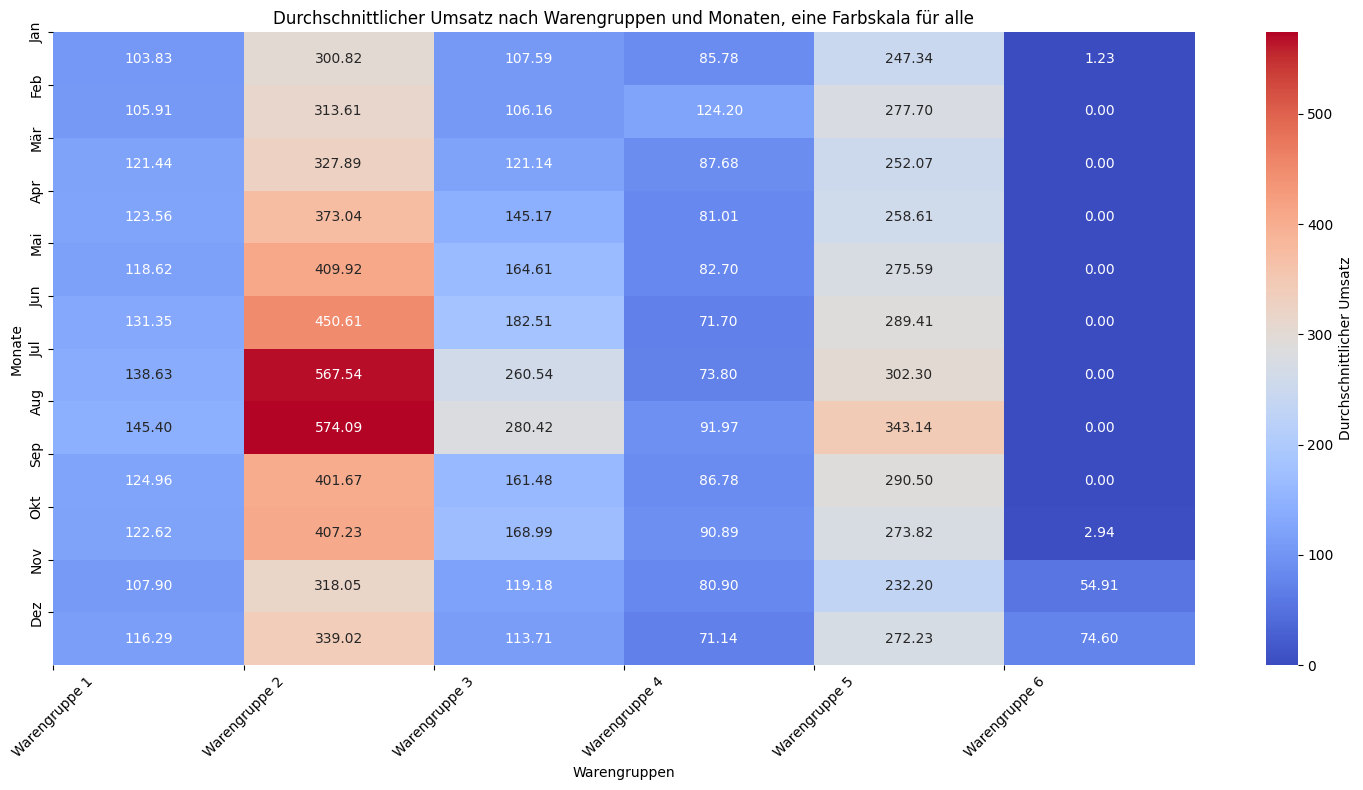

In [66]:
# Kopiere den DataFrame und bereite die Daten vor
# Änderungen am kopierten Data Frame führen zu keinen Änderungen am Original
umsatz_strukturiert = umsatz_strukturiert.copy()

# Datum in das richtige Format bringen und Monat extrahieren
umsatz_strukturiert['Datum'] = pd.to_datetime(umsatz_strukturiert['Datum'])
umsatz_strukturiert['Monat'] = umsatz_strukturiert['Datum'].dt.month

# Zählvariable hinzufügen, um Warengruppen zu kennzeichnen
umsatz_spalten = ['Umsatz1', 'Umsatz2', 'Umsatz3', 'Umsatz4', 'Umsatz5', 'Umsatz6']
warengruppe_labels = [f'Warengruppe {i+1}' for i in range(len(umsatz_spalten))]

for i, spalte in enumerate(umsatz_spalten):
    umsatz_strukturiert[warengruppe_labels[i]] = umsatz_strukturiert[spalte]

# Aggregation: Berechne den Durchschnittsumsatz je Warengruppe und Monat
umsatz_aggregiert = umsatz_strukturiert.groupby('Monat')[warengruppe_labels].mean()

# Heatmap erstellen
plt.figure(figsize=(15, 8))
sns.heatmap(umsatz_aggregiert, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f', 
            cbar_kws={'label': 'Durchschnittlicher Umsatz'})

plt.title('Durchschnittlicher Umsatz nach Warengruppen und Monaten, eine Farbskala für alle')
plt.xlabel('Warengruppen')
plt.ylabel('Monate')
plt.xticks(range(len(umsatz_aggregiert.columns)), umsatz_aggregiert.columns, rotation=45)
plt.yticks(range(len(umsatz_aggregiert.index)), 
           ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'])

plt.tight_layout()
plt.show()



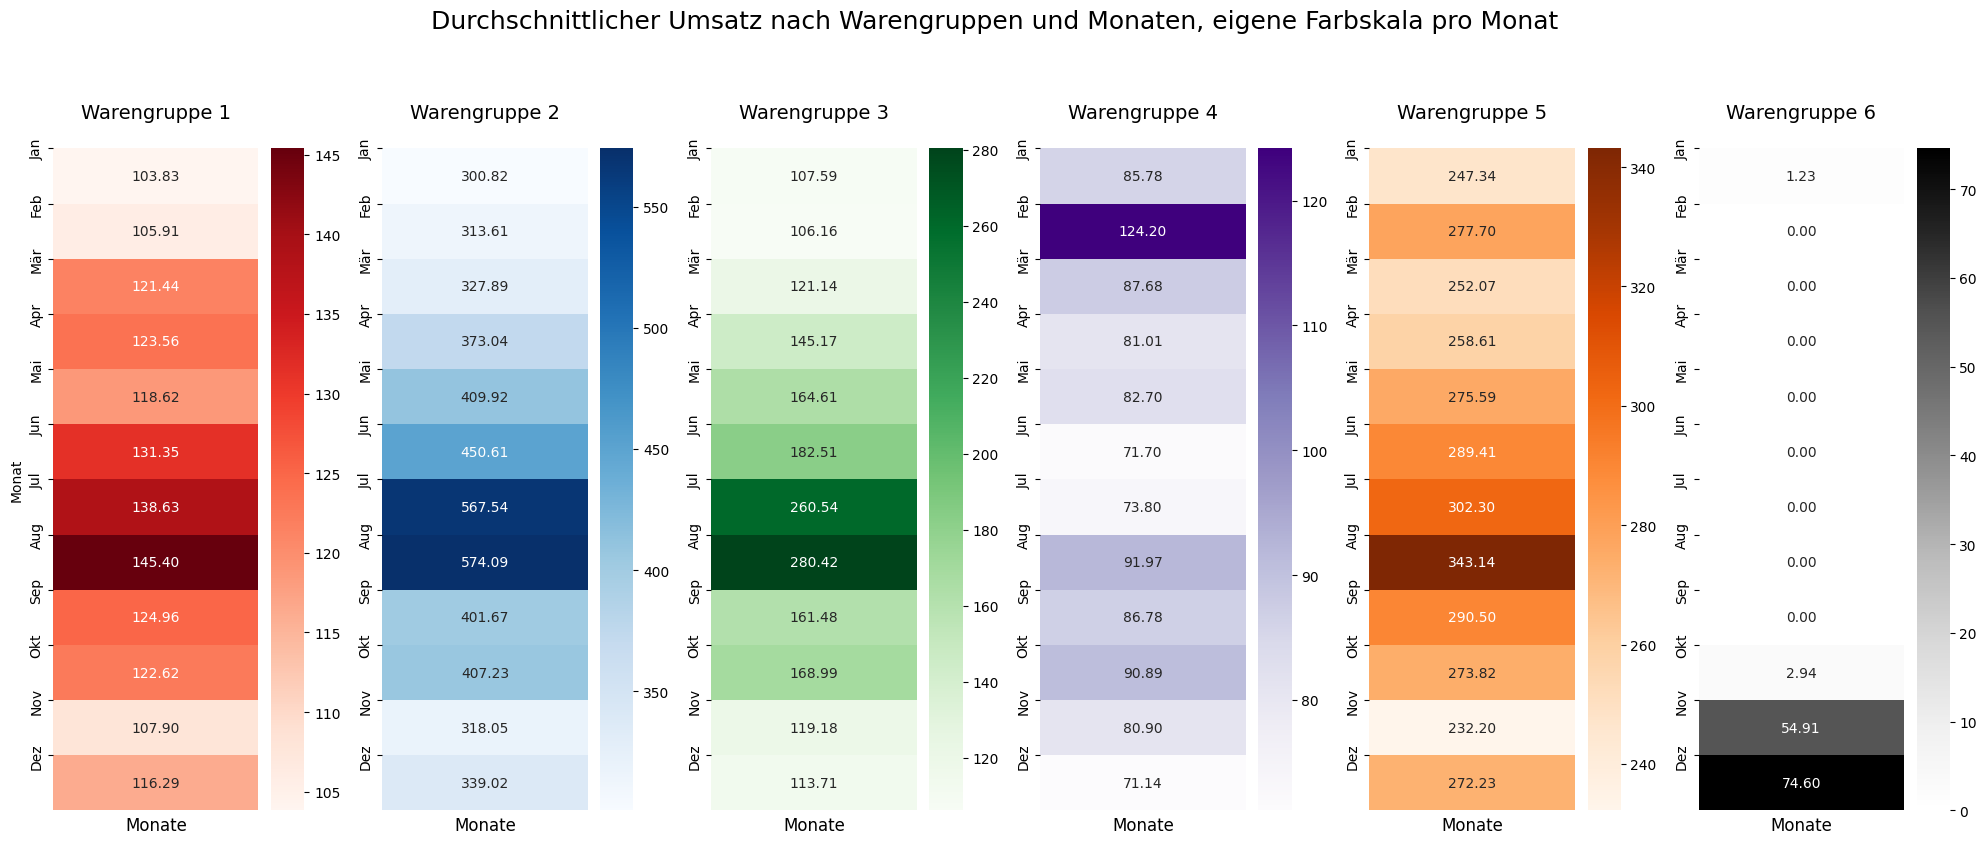

In [67]:
# Setup für mehrere Heatmaps - Eine für jede Warengruppe
fig, axes = plt.subplots(nrows=1, ncols=umsatz_aggregiert.shape[1], figsize=(20, 8))  # Eine Zeile mit so vielen Spalten wie Warengruppen

# Farbpaletten für die Warengruppen
color_palettes = ['Reds', 'Blues', 'Greens', 'Purples', 'Oranges', 'Greys']

# Zeichne jede Heatmap
for i, warengruppe in enumerate(umsatz_aggregiert.columns):
    ax = axes[i]  # Position im Raster
    sns.heatmap(
        umsatz_aggregiert[[warengruppe]],  # Nur Daten der aktuellen Warengruppe
        cmap=color_palettes[i % len(color_palettes)],  # Farbskala für die Warengruppe
        annot=True, 
        fmt='.2f', 
        cbar=True,                     # Farbskala anzeigen
        ax=ax,                         # Achse zuweisen
        vmin=umsatz_aggregiert[warengruppe].min(), 
        vmax=umsatz_aggregiert[warengruppe].max()  # Dynamische Skalierung pro Warengruppe
    )
    
    # Titel und Achsenbeschriftungen
    ax.set_title(f'{warengruppe}\n', fontsize=14)
    ax.set_xlabel('Monate', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks(range(len(umsatz_aggregiert.index)))
    ax.set_yticklabels(['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
    if i > 0:
        ax.set_ylabel('')  # Entferne doppelte Y-Beschriftungen


# Super-Titel über allen Heatmaps
plt.suptitle('Durchschnittlicher Umsatz nach Warengruppen und Monaten, eigene Farbskala pro Monat', fontsize=18, y=1.05)

# Optimierung des Layouts

plt.tight_layout()
plt.show()
